In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [82]:
url ="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url,sep='|',index_col= 'user_id')
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [83]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


In [84]:
users.shape[0]

943

In [85]:
users.shape[1]

4

In [86]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [87]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [88]:
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [89]:
users.occupation.head()

user_id
1    technician
2         other
3        writer
4    technician
5         other
Name: occupation, dtype: object

In [90]:
users.occupation.value_counts().count()

21

In [91]:
users.occupation.value_counts().head()

student          196
other            105
educator          95
administrator     79
engineer          67
Name: occupation, dtype: int64

In [92]:
users.occupation.value_counts().index

Index(['student', 'other', 'educator', 'administrator', 'engineer',
       'programmer', 'librarian', 'writer', 'executive', 'scientist', 'artist',
       'technician', 'marketing', 'entertainment', 'healthcare', 'retired',
       'salesman', 'lawyer', 'none', 'homemaker', 'doctor'],
      dtype='object')

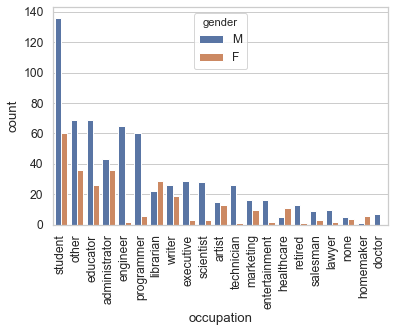

In [93]:
sns.countplot(users['occupation'],order=users.occupation.value_counts().index,hue =users['gender'] )
plt.xticks(rotation=90)
plt.show()

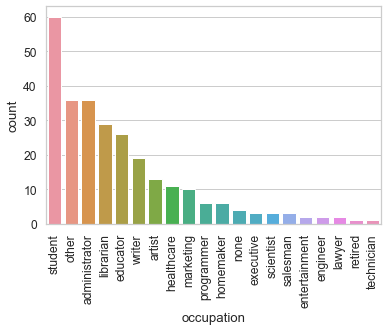

In [94]:
users_f = users[users['gender']=='F']
sns.countplot(users_f['occupation'],order=users_f.occupation.value_counts().index )
plt.xticks(rotation=90)
plt.show()
              

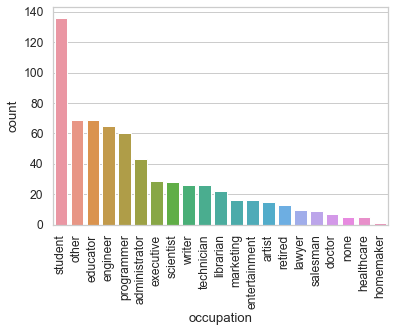

In [95]:
users_m = users[users['gender']=='M']
sns.countplot(users_m['occupation'],order=users_m.occupation.value_counts().index )
plt.xticks(rotation=90)
plt.show()


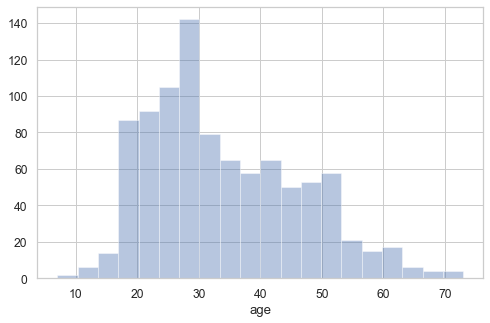

In [96]:

sns.set(style='whitegrid',               # changes style (white background with grid)
        palette="deep",                  # changes color palette
        font_scale=1.1,                  # increases font size
        rc={"figure.figsize": [8, 5]})

sns.distplot(users['age'],bins=20,kde=False,norm_hist=False)
plt.show()

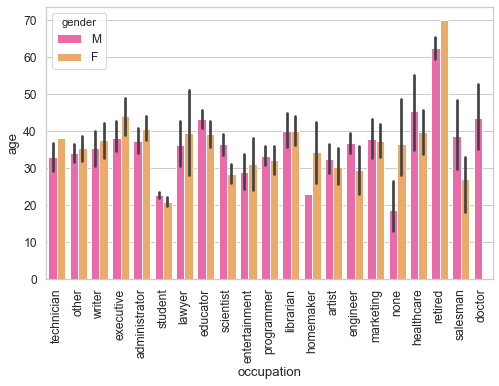

In [97]:
sns.barplot(x=users['occupation'],y=users['age'],hue =users['gender'],palette='spring')
plt.xticks(rotation=90)
plt.show()

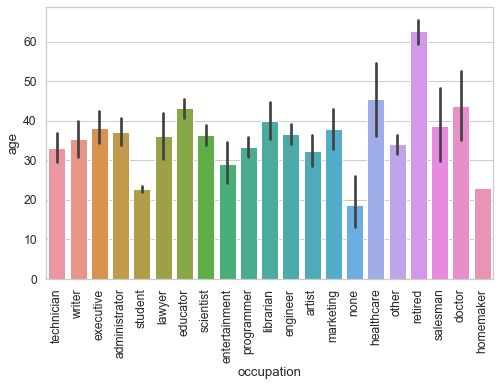

In [98]:
users_m = users[users['gender']=='M']
sns.barplot(y=users_m['age'].sort_values(),x=users_m['occupation'])
plt.xticks(rotation=90)
plt.show()


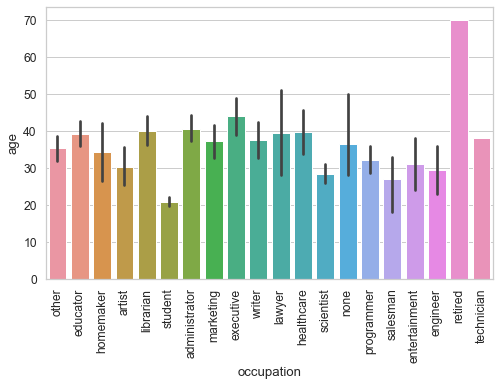

In [99]:
users_f = users[users['gender']=='F']
sns.barplot(y=users_f['age'].sort_values(),x=users_f['occupation'])
plt.xticks(rotation=90)
plt.show()


grouping age into categories: children, adults, middle age, old age

In [100]:

def age_dis(x):
    x = int(x)
    if x<=18:
        return ('children')
    elif x>18 and x<=35:
        return ('adults')
    elif x>35 and x<=50:
        return ('middle age')
    else:
        return ('old age')
    
users['age_new'] = users['age'].apply(lambda x: age_dis(x))
users['age_new'].head()

user_id
1     adults
2    old age
3     adults
4     adults
5     adults
Name: age_new, dtype: object

In [101]:
users.tail(10)

,age,gender,occupation,zip_code,age_new
user_id,,,,,
934,61,M,engineer,22902,old age
935,42,M,doctor,66221,middle age
936,24,M,other,32789,adults
937,48,M,educator,98072,middle age
938,38,F,technician,55038,middle age
939,26,F,student,33319,adults
940,32,M,administrator,02215,adults
941,20,M,student,97229,adults
942,48,F,librarian,78209,middle age


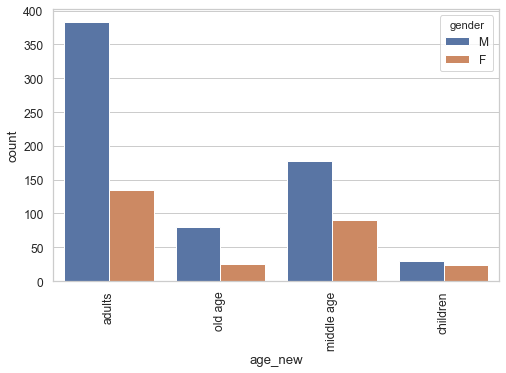

In [102]:
sns.countplot(users['age_new'],hue=users['gender'])
plt.xticks(rotation=90)
plt.show()